In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [34]:
import numpy as np
import nengo
from nengolib.signal import apply_filter
from nengolib.synapses import Highpass
import nengolib

u = [2., 2., 2.] # 1.0, 2.0, 0.5]
dt = 0.001

#num, den = [1.0, 0], [2.0, 1.0]
#num, den = nengolib.synapses.Highpass(0.01, order=1).tf
num, den = nengolib.synapses.Lowpass(0.01).tf
print num, den
    
for y0 in (None, -1, 0.5, 0, 2):
    #for sys in (nengolib.synapses.Highpass(0.01), nengolib.synapses.Highpass(0.01)):
    for sys in (nengolib.LinearFilter(num, den), nengo.LinearFilter(num, den)):
        #print nengolib.signal.is_exp_stable(sys)
        print sys.filt(u, dt=dt, y0=y0), apply_filter(sys, dt=dt, u=u)

 
1  
0.01 x + 1
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[ 2.  2.  2.] [ 0.          0.19032516  0.36253849]
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[-0.71451225 -0.45619226 -0.22245466] [ 0.          0.19032516  0.36253849]
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[ 0.64274387  0.77190387  0.88877267] [ 0.          0.19032516  0.36253849]
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[ 0.19032516  0.36253849  0.51836356] [ 0.          0.19032516  0.36253849]
[ 2.  2.  2.] [ 0.          0.19032516  0.36253849]


In [32]:
sys = nengolib.Lowpass(0.005)
dt = 0.001
length = 500

delta = np.zeros(length)
delta[0] = 1./dt

#response = nengolib.signal.impulse(sys, dt, length)
#print response[0:3]

response = sys.filt(delta, dt=dt, y0=0)
print response[0:3]

response = apply_filter(sys, dt=dt, u=delta)
print response[0:3]


[ 181.26924692  148.41070704  121.50840994]
[   0.          181.26924692  148.41070704]


In [3]:
sys = nengolib.LinearFilter(num, den)  # nengolib.Alpha(0.01)
sys = nengolib.signal.cont2discrete(sys.ss, dt=dt)
#sys *= nengolib.signal.z
sys = nengolib.signal.canonical(sys)
print sys.A
print sys.B
print sys.C
print sys.D

print np.sum(sys.C) #+ sys.D
print 1.0 / 110.42504026

[[ 0.90483742]]
[[ 1.]]
[[-0.09516258]]
[[ 1.]]
-0.095162581964
0.00905591700619


In [9]:
y0 = -1.0
U = [-1.0]
# x = np.zeros(len(sys))
x = np.ones(len(sys)) * (y0 - sys.D[0][0]) / np.sum(sys.C) # (y0 - sys.D[0][0]) / sys.C[0, :]

print x
x = (sys.D[0][0] - y0) / (1 - np.sum(sys.A[0, :]))
print x

for _ in range(50):
    print x, np.dot(sys.C, x) + np.dot(sys.D, U)
    x = np.dot(sys.A, x) + np.dot(sys.B, U)

[ 21.01666389]
21.0166638896
21.0166638896 [[-3.]]
[[ 18.01666389]] [[-2.71451225]]
[[ 15.30215164]] [[-2.45619226]]
[[ 12.84595938]] [[-2.22245466]]
[[ 10.62350471]] [[-2.01096014]]
[[ 8.61254458]] [[-1.81959198]]
[[ 6.7929526]] [[-1.64643491]]
[[ 5.14651769]] [[-1.48975591]]
[[ 3.65676178]] [[-1.34798689]]
[[ 2.30877488]] [[-1.21970898]]
[[ 1.08906591]] [[-1.10363832]]
[[-0.01457242]] [[-0.99861325]]
[[-1.01318567]] [[-0.90358264]]
[[-1.9167683]] [[-0.81759538]]
[[-2.73436368]] [[-0.73979089]]
[[-3.47415458]] [[-0.66939048]]
[[-4.14354506]] [[-0.60568955]]
[[-4.74923461]] [[-0.54805057]]
[[-5.29728518]] [[-0.49589666]]
[[-5.79318185]] [[-0.44870586]]
[[-6.2418877]] [[-0.40600585]]
[[-6.64789355]] [[-0.36736928]]
[[-7.01526284]] [[-0.33240948]]
[[-7.34767231]] [[-0.30077653]]
[[-7.64844885]] [[-0.27215386]]
[[-7.92060271]] [[-0.246255]]
[[-8.1668577]] [[-0.22282073]]
[[-8.38967844]] [[-0.20161654]]
[[-8.59129497]] [[-0.18243019]]
[[-8.77372516]] [[-0.16506966]]
[[-8.93879482]] [[-0.14

In [9]:
u = np.zeros(50000)
u[0] = 1.0

print np.sum((nengolib.Lowpass(0.1)).filt(u, dt=dt, y0=0))



1.0


In [34]:
import nengo

y0 = 1.0
gain = 2
tau = 0.005
synapse = nengo.LinearFilter([gain], [tau**2, 2*tau, 1])

u = np.ones(100) * (y0 / gain)
y = synapse.filt(u, y0=y0)

print y

[ 1.01533544  1.0251112   1.03083897  1.03366508  1.03445329  1.03384957
  1.03233263  1.03025339  1.02786555  1.02534932  1.02282969  1.02039059
  1.0180856   1.01594626  1.01398824  1.01221611  1.01062681  1.00921229
  1.00796141  1.00686131  1.00589845  1.0050592   1.0043304   1.00369958
  1.00315517  1.00268656  1.00228417  1.00193939  1.00164454  1.00139287
  1.0011784   1.00099591  1.00084086  1.0007093   1.00059781  1.00050343
  1.00042362  1.00035621  1.00029931  1.00025134  1.00021092  1.0001769
  1.00014828  1.00012423  1.00010402  1.00008706  1.00007283  1.00006089
  1.00005089  1.00004252  1.00003551  1.00002964  1.00002473  1.00002063
  1.00001721  1.00001434  1.00001195  1.00000996  1.00000829  1.00000691
  1.00000575  1.00000478  1.00000398  1.00000331  1.00000275  1.00000229
  1.0000019   1.00000158  1.00000131  1.00000109  1.00000091  1.00000075
  1.00000062  1.00000052  1.00000043  1.00000036  1.0000003   1.00000025
  1.0000002   1.00000017  1.00000014  1.00000012  1.

In [39]:
print nengolib.signal.cont2discrete(nengolib.Lowpass(1.0), dt=1.0)

print 1 - np.exp(-1)
print np.exp(-1)

([ 0.63212056], [ 1.         -0.36787944], False)
0.632120558829
0.367879441171


In [40]:
print nengolib.signal.cont2discrete(~nengolib.signal.s, dt=1.0)

([ 1.], [ 1. -1.], False)


1.0


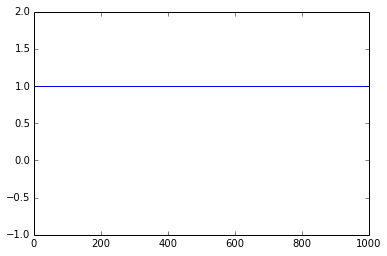

1.13287157433e-12


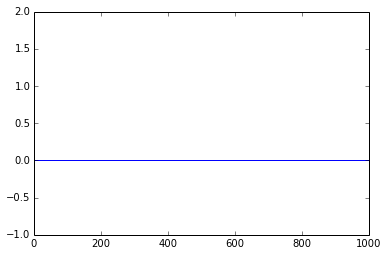

0.00999999999991


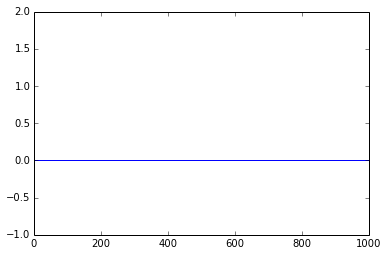

In [71]:
sys = nengolib.Alpha(0.1)  # nengolib.signal.cont2discrete(nengolib.Alpha(0.1), dt=0.001)

#sys, _ = nengolib.signal.L1Norm()(sys)


u = np.ones(1000)
#u[0] = 1000

#y = sys.filt(u, dt=0.001)

for sys in [sys] + nengolib.signal.decompose_states(sys):
    y = sys.filt(u, dt=0.001)
    print max(abs(y))
    pylab.figure()
    pylab.plot(y)
    pylab.ylim(-1, 2)
    pylab.show()